In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
from sklearn import linear_model

In [11]:
np.set_printoptions(precision = 3)

pd.set_option("precision", 3)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [12]:
%matplotlib inline

In [13]:
HOURS_of_STUDY = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [14]:
PASSING_EXAM = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                         0, 1, 1, 1, 1, 1, 1])

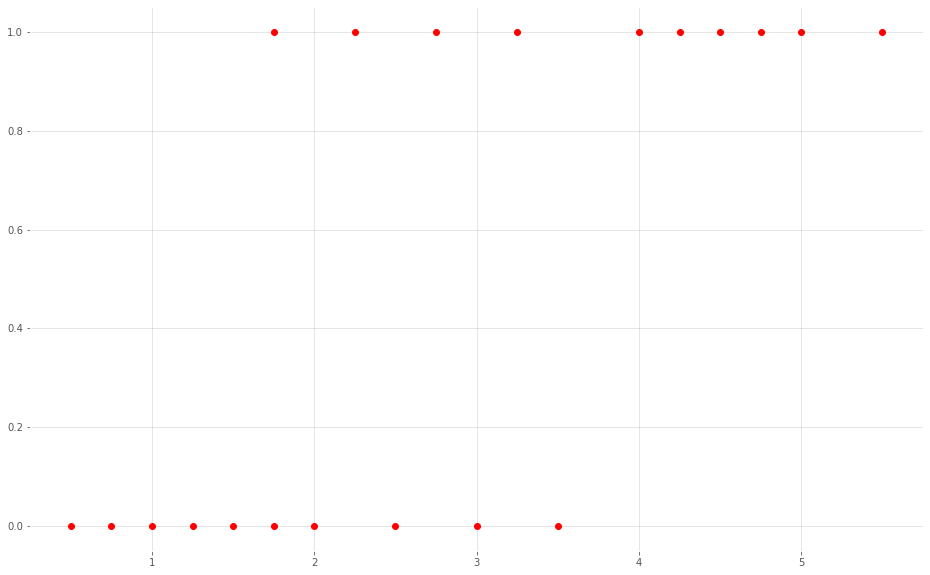

In [15]:
plt.figure(figsize = (16,10))

plt.plot(HOURS_of_STUDY,
         PASSING_EXAM,
         "ro")

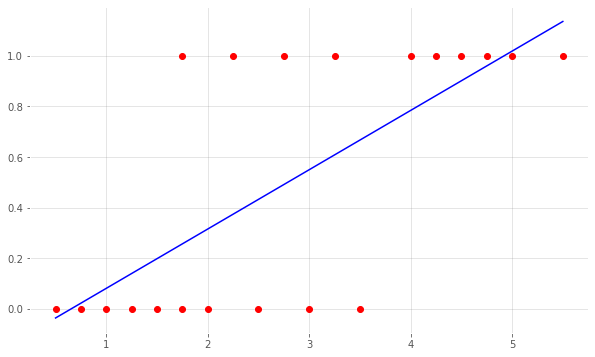

In [16]:
REGRESS = np.polyfit(HOURS_of_STUDY,
                     PASSING_EXAM,
                     deg = 1)

plt.figure(figsize = (10, 6)
          )
plt.plot(HOURS_of_STUDY,
         PASSING_EXAM, 
         "ro")
plt.plot(HOURS_of_STUDY,
         np.polyval(REGRESS, HOURS_of_STUDY), "b"
        )

In [17]:
model = linear_model.LogisticRegression(solver = "lbfgs",C = 1e7,
                                    multi_class = "auto",
                                    max_iter = 10000)
model

LogisticRegression(C=10000000.0, max_iter=10000)

In [18]:
HOURS_of_STUDY = HOURS_of_STUDY.reshape(-1,1)

In [19]:
model.fit(HOURS_of_STUDY,
          PASSING_EXAM)

LogisticRegression(C=10000000.0, max_iter=10000)

In [20]:
predictions = model.predict(HOURS_of_STUDY)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

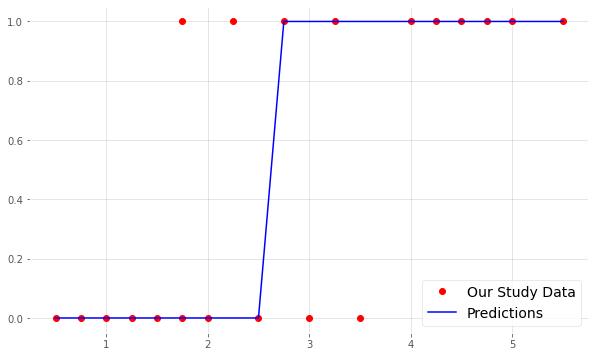

In [21]:
plt.figure(figsize = (10, 6)
          )
plt.plot(HOURS_of_STUDY,
         PASSING_EXAM, 
         "ro",
         label = "Our Study Data")
plt.plot(HOURS_of_STUDY,
         predictions, 
         "b",
         label = "Predictions"
        )

plt.legend(loc = 0)

In [22]:
probability = model.predict_proba(HOURS_of_STUDY)

In [23]:
probability

array([[0.965, 0.035],
       [0.95 , 0.05 ],
       [0.929, 0.071],
       [0.9  , 0.1  ],
       [0.861, 0.139],
       [0.809, 0.191],
       [0.809, 0.191],
       [0.744, 0.256],
       [0.666, 0.334],
       [0.578, 0.422],
       [0.485, 0.515],
       [0.393, 0.607],
       [0.307, 0.693],
       [0.234, 0.766],
       [0.126, 0.874],
       [0.09 , 0.91 ],
       [0.063, 0.937],
       [0.044, 0.956],
       [0.031, 0.969],
       [0.015, 0.985]])

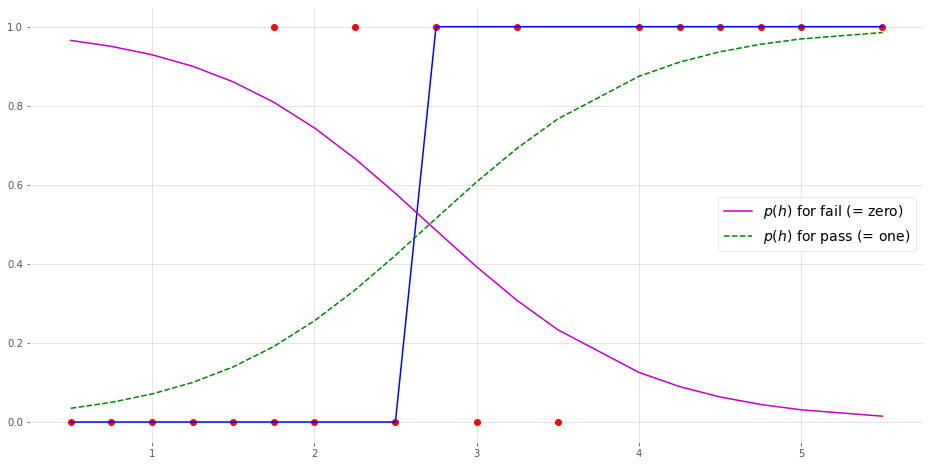

In [24]:
plt.figure(figsize = (16, 8)
          )

plt.plot(HOURS_of_STUDY,
         PASSING_EXAM, 
         "ro")

plt.plot(HOURS_of_STUDY,
         predictions, 
         "b"
        )

plt.plot(HOURS_of_STUDY,
         probability.T[0],
         "m-",
         label = "$p(h)$ for fail (= zero)"
         )

plt.plot(HOURS_of_STUDY,
         probability.T[1],
         "g--",
         label = "$p(h)$ for pass (= one)"
         )

plt.legend(loc = 0)